This notebook shows how I define the position angle (PA).

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
import numpy as np
from numpy import pi, sin, cos
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

from error_ellipse import ellipse_shape_from_cov
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.catalog.read_gaia import read_dr2_iers

First cross-match the four catalogs (S/X, K, X/Ka of ICRF3 and Gaia DR2) and calculate the position offset wrt. the S/X position.

In [2]:
icrf3x = read_icrf3(wv="sx")
icrf3x.keep_columns(["iers_name", "ra_dec_corr"])
icrf3x.rename_column("ra_dec_corr", "ra_dec_corr_x")

icrf3k = read_icrf3(wv="k")
icrf3k.keep_columns(["iers_name", "ra_dec_corr"])
icrf3k.rename_column("ra_dec_corr", "ra_dec_corr_k")

icrf3ka = read_icrf3(wv="xka")
icrf3ka.keep_columns(["iers_name", "ra_dec_corr"])
icrf3ka.rename_column("ra_dec_corr", "ra_dec_corr_ka")

gdr2 = read_dr2_iers()
gdr2.keep_columns(["iers_name", "ra_dec_corr"])
gdr2.rename_column("ra_dec_corr", "ra_dec_corr_g")

comsou = Table.read("../data/common-source-position.fits")

comsou = join(comsou, icrf3x, keys="iers_name")
comsou = join(comsou, icrf3k, keys="iers_name")
comsou = join(comsou, icrf3ka, keys="iers_name")
comsou = join(comsou, gdr2, keys="iers_name")

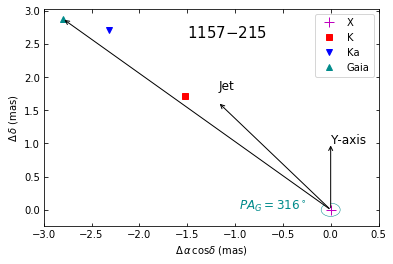

In [3]:
comsou1 = comsou[comsou["iers_name"] == "1157-215"]

# Positional offset vector
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(0, 0, "m+", label="X", ms=10)
ax.plot(comsou1[0]["dra_k_all2"], comsou1[0]["ddec_k_all2"], "rs", label="K")
ax.plot(comsou1[0]["dra_ka_all2"], comsou1[0]["ddec_ka_all2"], "bv", label="Ka")
ax.plot(comsou1[0]["dra_g_all2"], comsou1[0]["ddec_g_all2"], "^", color="darkcyan", label="Gaia")

# ax.arrow(0, 0, comsou1[0]["dra_g_all2"], comsou1[0]["ddec_g_all2"], color="darkcyan", lw=0.5)
ax.annotate("", xy=(comsou1[0]["dra_g_all2"], comsou1[0]["ddec_g_all2"]), 
            xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

# Plot the vetical line
# declination axis
ax.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color="k")
ax.text(0, 1, "Y-axis", fontsize=12)

# Jet direction
jetpa = np.deg2rad(324)
jetr = 2
jetx, jety = jetr * sin(jetpa), jetr * cos(jetpa)
ax.annotate("", xy=(jetx, jety), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color="k")
ax.text(jetx, jety+0.2, "Jet", fontsize=12)

# Plot position angle indicator
# Radius 
r_opt = 0.1

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

# plot a circle
x_opt, y_opt = sin(theta_opt) * r_opt, cos(theta_opt) * r_opt
ax.plot(x_opt, y_opt, color="darkcyan", lw=0.5)

# Add angle value
x_optm, y_optm = sin(parad_opt/2) * r_opt, cos(parad_opt/2) * r_opt
ax.text(x_optm-1, y_optm+0.1, "$PA_G = {:.0f}^\\circ$".format(pa_opt), color="darkcyan", fontsize=12)

### TO DO 
### Plot error ellipse

ax.set_xlim(-3, 0.5)
# ax.set_ylim(-0.8, 0.25)

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.text(-1.5, 2.6, "1157$-$215", fontsize=15)

ax.legend()

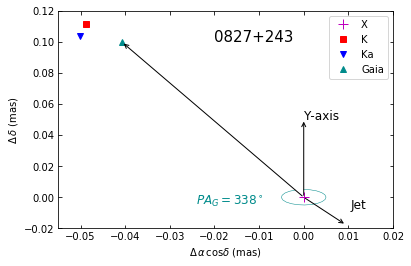

In [4]:
comsou1 = comsou[comsou["iers_name"] == "0827+243"]

# Positional offset vector
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(0, 0, "m+", label="X", ms=10)
ax.plot(comsou1[0]["dra_k_all2"], comsou1[0]["ddec_k_all2"], "rs", label="K")
ax.plot(comsou1[0]["dra_ka_all2"], comsou1[0]["ddec_ka_all2"], "bv", label="Ka")
ax.plot(comsou1[0]["dra_g_all2"], comsou1[0]["ddec_g_all2"], "^", color="darkcyan", label="Gaia")

ax.annotate("", xy=(comsou1[0]["dra_g_all2"], comsou1[0]["ddec_g_all2"]), 
            xytext=(0, 0), arrowprops=dict(arrowstyle="->"))


# Plot the vetical line
# declination axis
ax.annotate("", xy=(0, 0.05), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color="k")
ax.text(0, 0.05, "Y-axis", fontsize=12)

# Jet direction
jetpa = np.deg2rad(152)
jetr = 0.02
jetx, jety = jetr * sin(jetpa), jetr * cos(jetpa)
ax.annotate("", xy=(jetx, jety), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color="k")
ax.text(jetx+0.001, jety+0.01, "Jet", fontsize=12)

# Plot position angle indicator
# Radius 
r_opt = 0.005

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

# plot a circle
x_opt, y_opt = sin(theta_opt) * r_opt, cos(theta_opt) * r_opt
ax.plot(x_opt, y_opt, color="darkcyan", lw=0.5)

# Add angle value
x_optm, y_optm = sin(parad_opt/2) * r_opt, cos(parad_opt/2) * r_opt
ax.text(x_optm-0.025, y_optm, "$PA_G = {:.0f}^\\circ$".format(pa_opt), color="darkcyan", fontsize=12)

### TO DO 
### Plot error ellipse

ax.set_xlim(-0.055, 0.02)
ax.set_ylim(-0.02, 0.12)

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.text(-0.02, 0.1, "0827+243", fontsize=15)


ax.legend()

Replot position offsets for all sources.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


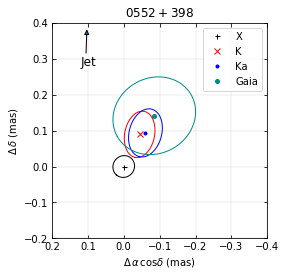

In [36]:
souname = "0552+398"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 358

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.12, 0.28, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.3
ax.axis("square")
ax.axis([xlim-0.1, -xlim-0.1, -xlim+0.1, xlim+0.1])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


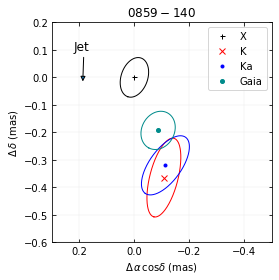

In [6]:
souname = "0859-140"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 178

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))
# fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.22, 0.1, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim-0.1, -xlim-0.1, -xlim-0.2, xlim-0.2])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.1)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


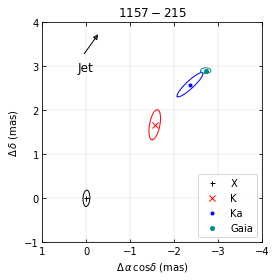

In [7]:
souname = "1157-215"
comsou1 = comsou[comsou["iers_name"] == souname]

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# Jet direction
jetpa = np.deg2rad(324)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.2, 2.9, "Jet", fontsize=12)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 2.5
ax.axis("square")
ax.axis([xlim-1.5, -xlim-1.5, -xlim+1.5, xlim+1.5])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)
plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


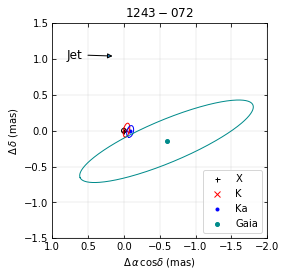

In [8]:
souname = "1243-072"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 268

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.8, 1, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 1.5
ax.axis("square")
ax.axis([xlim-0.5, -xlim-0.5, -xlim, xlim])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


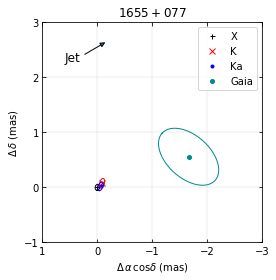

In [50]:
souname = "1655+077"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 300

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.6, 2.3, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 2
ax.axis("square")
ax.axis([xlim-1, -xlim-1, -xlim+1, xlim+1])
ax.set_yticks(np.arange(-1, 3.1, 1))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


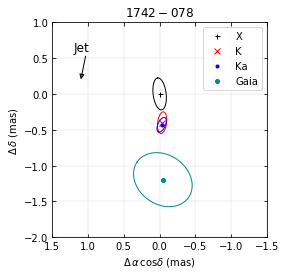

In [9]:
souname = "1742-078"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 169

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(1.2, 0.6, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 1.5
ax.axis("square")
ax.axis([xlim, -xlim, -xlim-0.5, xlim-0.5])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


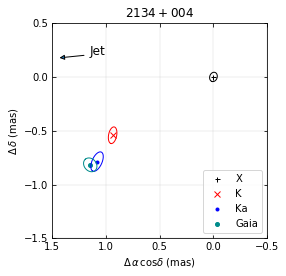

In [10]:
souname = "2134+004"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 96

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(1.15, 0.2, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 1.
ax.axis("square")
ax.axis([xlim+0.5, -xlim+0.5, -xlim-0.5, xlim-0.5])
ax.set_yticks(np.arange(-1.5, 0.6, 0.5))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


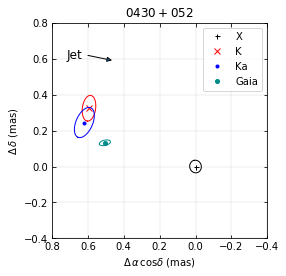

In [11]:
souname = "0430+052"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 258

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.72, 0.6, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.6
ax.axis("square")
ax.axis([xlim+0.2, -xlim+0.2, -xlim+0.2, xlim+0.2])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


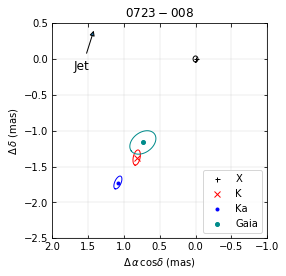

In [12]:
souname = "0723-008"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 343

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(1.7, -0.15, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 1.5
ax.axis("square")
ax.axis([xlim+0.5, -xlim+0.5, -xlim-1, xlim-1])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


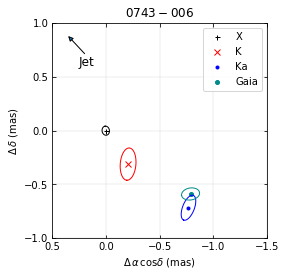

In [13]:
souname = "0743-006"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 42

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.25, 0.6, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 1.
ax.axis("square")
ax.axis([xlim-0.5, -xlim-0.5, -xlim, xlim])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_yticks(np.arange(-1, 1.1, 0.5))

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()

plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


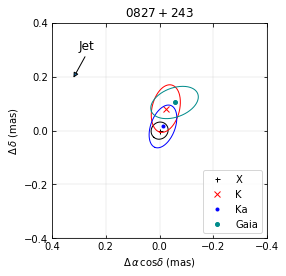

In [56]:
souname = "0827+243"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 152

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(152)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.3, 0.3, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim, -xlim, -xlim, xlim])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_yticks(np.arange(-0.4, 0.41, 0.2))
# ax.set_xticks(np.arange(-1., 0.6, 0.5))

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()
# plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")
plt.savefig("../plots/{:s}.eps".format(souname))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


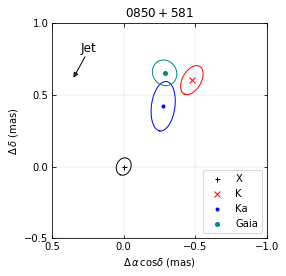

In [14]:
souname = "0850+581"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 153

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(152)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.3, 0.8, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.75
ax.axis("square")
ax.axis([xlim-0.25, -xlim-0.25, -xlim+0.25, xlim+0.25])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_yticks(np.arange(-0.5, 1.1, 0.5))
ax.set_xticks(np.arange(-1., 0.6, 0.5))

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()
# plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")
plt.savefig("../plots/{:s}.eps".format(souname))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


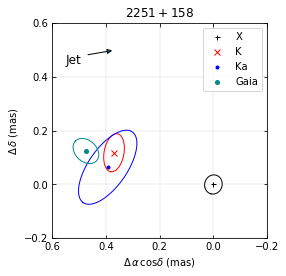

In [15]:
souname = "2251+158"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 280

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.55, 0.45, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim+0.2, -xlim+0.2, -xlim+0.2, xlim+0.2])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_yticks(np.arange(-0.2, 0.61, 0.2))

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


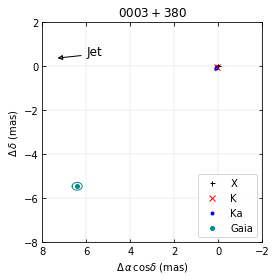

In [16]:
souname = "0003+380"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 96

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(6, 0.5, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 5
ax.axis("square")
ax.axis([xlim+3, -xlim+3, -xlim-3, xlim-3])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


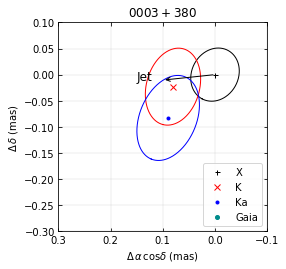

In [17]:
souname = "0003+380"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 96

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
jetx, jety = jetr * sin(jetpa), jetr * cos(jetpa)
ax.annotate("", xy=(jetx, jety), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color="k")
ax.text(jetx+0.05, jety, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.2
ax.axis("square")
ax.axis([xlim+0.1, -xlim+0.1, -xlim-0.1, xlim-0.1])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}-1.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


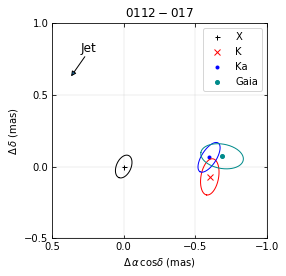

In [18]:
souname = "0112-017"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 146

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.3, 0.8, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.75
ax.axis("square")
ax.axis([xlim-0.25, -xlim-0.25, -xlim+0.25, xlim+0.25])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_xticks(np.arange(-1., 0.51, 0.5))
ax.set_yticks(np.arange(-0.5, 1.1, 0.5))

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


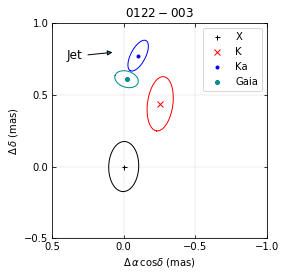

In [19]:
souname = "0122-003"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 276

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.4, 0.75, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.75
ax.axis("square")
ax.axis([xlim-0.25, -xlim-0.25, -xlim+0.25, xlim+0.25])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_xticks(np.arange(-1., 0.51, 0.5))
ax.set_yticks(np.arange(-0.5, 1.1, 0.5))

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


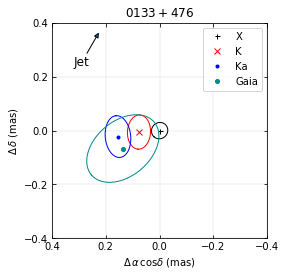

In [20]:
souname = "0133+476"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 331

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.32, 0.24, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim, -xlim, -xlim, xlim])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")
ax.set_yticks(np.arange(-0.4, 0.41, 0.2))

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


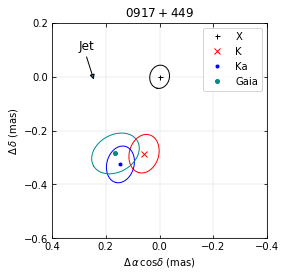

In [23]:
souname = "0917+449"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 197

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)


# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.3, 0.1, "Jet", fontsize=12)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim, -xlim, -xlim-0.2, xlim-0.2])
ax.set_yticks(np.arange(-0.6, 0.21, 0.2))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


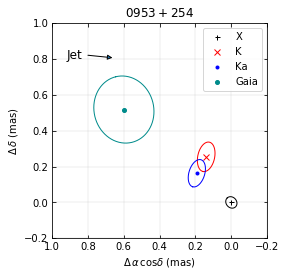

In [24]:
souname = "0953+254"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 264

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.92, 0.8, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.6
ax.axis("square")
ax.axis([xlim+0.4, -xlim+0.4, -xlim+0.4, xlim+0.4])

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


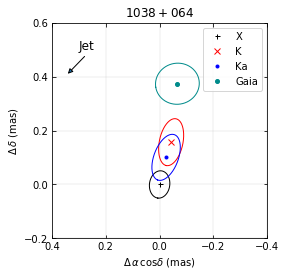

In [25]:
souname = "1038+064"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 137

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.3, 0.5, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim, -xlim, -xlim+0.2, xlim+0.2])
ax.set_yticks(np.arange(-0.2, 0.61, 0.2))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


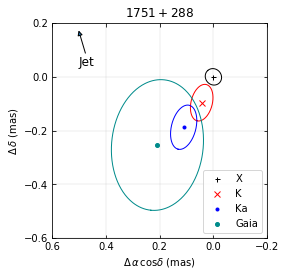

In [26]:
souname = "1751+288"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 16

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# # Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.5, 0.04, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim+0.2, -xlim+0.2, -xlim-0.2, xlim-0.2])
ax.set_yticks(np.arange(-0.6, 0.21, 0.2))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend(loc="lower right")
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


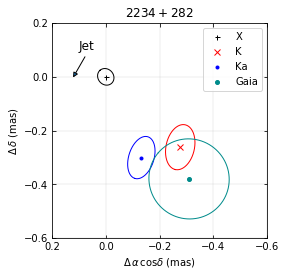

In [27]:
souname = "2234+282"
comsou1 = comsou[comsou["iers_name"] == souname]
jetpa = 151

# Error ellipse
# X
ra_err = comsou1["ra_err_x"][0]
dec_err = comsou1["dec_err_x"][0]
ra_dec_corr = comsou1["ra_dec_corr_x"][0]
x_x, y_x = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)

# K
dra_k = comsou1["dra_k_ccl2"][0]
ddec_k = comsou1["ddec_k_ccl2"][0]
ra_err = comsou1["ra_err_k"][0]
dec_err = comsou1["dec_err_k"][0]
ra_dec_corr = comsou1["ra_dec_corr_k"][0]
x_k, y_k = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_k, y_k = x_k + dra_k, y_k + ddec_k

# Ka
dra_ka = comsou1["dra_ka_ccl2"][0]
ddec_ka = comsou1["ddec_ka_ccl2"][0]
ra_err = comsou1["ra_err_ka"][0]
dec_err = comsou1["dec_err_ka"][0]
ra_dec_corr = comsou1["ra_dec_corr_ka"][0]
x_ka, y_ka = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_ka, y_ka = x_ka + dra_ka, y_ka + ddec_ka

# Gaia
dra_g = comsou1["dra_g_ccl2"][0]
ddec_g = comsou1["ddec_g_ccl2"][0]
ra_err = comsou1["ra_err_g"][0]
dec_err = comsou1["dec_err_g"][0]
ra_dec_corr = comsou1["ra_dec_corr_g"][0]
x_g, y_g = ellipse_shape_from_cov(ra_err, dec_err, ra_dec_corr, scale=1)
x_g, y_g = x_g + dra_g, y_g + ddec_g

# Positional offset vector
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(0, 0, "k+", label="X", ms=5)
ax.plot(dra_k, ddec_k, "rx", label="K")
ax.plot(dra_ka, ddec_ka, "b.", label="Ka")
ax.plot(dra_g, ddec_g, "o", color="darkcyan", label="Gaia", ms=4)

# Jet direction
jetpa = np.deg2rad(jetpa)
jetr = 0.1
x0, y0 = 0.3, 0.8
jetx, jety = -jetr * sin(jetpa) + x0, jetr * cos(jetpa) + y0
ax.annotate("", xy=(jetx, jety), xytext=(x0, y0), arrowprops=dict(arrowstyle="-|>"), color="grey",
           xycoords="figure fraction")
ax.text(0.1, 0.1, "Jet", fontsize=12)

# Position angle
pa_opt = comsou1[0]["pa_g_all2"]
parad_opt = np.deg2rad(pa_opt)
theta_opt = np.linspace(0, parad_opt, 20)

### Plot error ellipse
ax.plot(x_x, y_x, "k-", lw=1)
ax.plot(x_k, y_k, "r-", lw=1)
ax.plot(x_ka, y_ka, "b-", lw=1)
ax.plot(x_g, y_g, "-", lw=1, color="darkcyan")

xlim = 0.4
ax.axis("square")
ax.axis([xlim-0.2, -xlim-0.2, -xlim-0.2, xlim-0.2])
ax.set_yticks(np.arange(-0.6, 0.21, 0.2))

ax.set_xlabel("$\Delta\,\\alpha\,\cos\delta$ (mas)")
ax.set_ylabel("$\Delta\,\delta$ (mas)")

ax.set_title("${:s}$".format(souname))
ax.legend()
ax.grid(linewidth=0.2)

plt.tight_layout()
plt.savefig("../plots/{:s}.eps".format(souname), hbox="tight")

Check my results of calculating PA

In [28]:
from astropy.coordinates import SkyOffsetFrame, ICRS, SkyCoord

In [29]:
gdr2 = read_dr2_iers()

icrf3x = read_icrf3(wv="sx")
icrf3k = read_icrf3(wv="k")
icrf3ka = read_icrf3(wv="xka")

tmp1 = join(icrf3x, icrf3k, keys="iers_name", table_names=["x", "k"])
tmp2 = join(icrf3ka, gdr2, keys="iers_name", table_names=["ka", "g"])

comsou1 = join(tmp1, tmp2, keys="iers_name")

comsou1.keep_columns(["iers_name",
                     "ra_x", "dec_x", "ra_k", "dec_k",
                     "ra_ka", "dec_ka", "ra_g", "dec_g"])

In [30]:
coord_x = SkyCoord(comsou1["ra_x"], comsou1["dec_x"], frame='icrs')
coord_k = SkyCoord(comsou1["ra_k"], comsou1["dec_k"], frame='icrs')
coord_ka = SkyCoord(comsou1["ra_ka"], comsou1["dec_ka"], frame='icrs')
coord_g = SkyCoord(comsou1["ra_g"], comsou1["dec_g"], frame='icrs')

In [31]:
dra_k, ddec_k = coord_x.spherical_offsets_to(coord_k)
dra_k, ddec_k = dra_k.to(u.uas), ddec_k.to(u.uas)

pa = coord_x.position_angle(coord_k)
pa = pa.to(u.deg)

sep = coord_x.separation(coord_k)
sep = sep.to(u.uas)

In [32]:
dra_k.value[0], ddec_k.value[0], pa.value[0], sep.value[0]

(-44.19094225527851,
 -59.599993070505015,
 216.55543991416926,
 74.19571709810374)

In [33]:
comsou[comsou["iers_name"] == comsou1[0]["iers_name"]]

iers_name,ra_err_k,dec_err_k,pos_err_k,ra,dec,ra_err_x,dec_err_x,pos_err_x,dra_k,ddec_k,dra_err_k,ddec_err_k,dra_ddec_cov_k,ang_sep_k,pa_k,nor_ra_k,nor_dec_k,nor_sep_k,dra_k_all1,ddec_k_all1,ang_sep_k_all1,pa_k_all1,nor_ra_k_all1,nor_dec_k_all1,nor_sep_k_all1,dra_k_all2,ddec_k_all2,ang_sep_k_all2,pa_k_all2,nor_ra_k_all2,nor_dec_k_all2,nor_sep_k_all2,dra_k_cln1,ddec_k_cln1,ang_sep_k_cln1,pa_k_cln1,nor_ra_k_cln1,nor_dec_k_cln1,nor_sep_k_cln1,dra_k_cln2,ddec_k_cln2,ang_sep_k_cln2,pa_k_cln2,nor_ra_k_cln2,nor_dec_k_cln2,nor_sep_k_cln2,dra_k_com1,ddec_k_com1,ang_sep_k_com1,pa_k_com1,nor_ra_k_com1,nor_dec_k_com1,nor_sep_k_com1,dra_k_com2,ddec_k_com2,ang_sep_k_com2,pa_k_com2,nor_ra_k_com2,nor_dec_k_com2,nor_sep_k_com2,dra_k_ccl1,ddec_k_ccl1,ang_sep_k_ccl1,pa_k_ccl1,nor_ra_k_ccl1,nor_dec_k_ccl1,nor_sep_k_ccl1,dra_k_ccl2,ddec_k_ccl2,ang_sep_k_ccl2,pa_k_ccl2,nor_ra_k_ccl2,nor_dec_k_ccl2,nor_sep_k_ccl2,ra_err_ka,dec_err_ka,pos_err_ka,dra_ka,ddec_ka,dra_err_ka,ddec_err_ka,dra_ddec_cov_ka,ang_sep_ka,pa_ka,nor_ra_ka,nor_dec_ka,nor_sep_ka,dra_ka_all1,ddec_ka_all1,ang_sep_ka_all1,pa_ka_all1,nor_ra_ka_all1,nor_dec_ka_all1,nor_sep_ka_all1,dra_ka_all2,ddec_ka_all2,ang_sep_ka_all2,pa_ka_all2,nor_ra_ka_all2,nor_dec_ka_all2,nor_sep_ka_all2,dra_ka_cln1,ddec_ka_cln1,ang_sep_ka_cln1,pa_ka_cln1,nor_ra_ka_cln1,nor_dec_ka_cln1,nor_sep_ka_cln1,dra_ka_cln2,ddec_ka_cln2,ang_sep_ka_cln2,pa_ka_cln2,nor_ra_ka_cln2,nor_dec_ka_cln2,nor_sep_ka_cln2,dra_ka_com1,ddec_ka_com1,ang_sep_ka_com1,pa_ka_com1,nor_ra_ka_com1,nor_dec_ka_com1,nor_sep_ka_com1,dra_ka_com2,ddec_ka_com2,ang_sep_ka_com2,pa_ka_com2,nor_ra_ka_com2,nor_dec_ka_com2,nor_sep_ka_com2,dra_ka_ccl1,ddec_ka_ccl1,ang_sep_ka_ccl1,pa_ka_ccl1,nor_ra_ka_ccl1,nor_dec_ka_ccl1,nor_sep_ka_ccl1,dra_ka_ccl2,ddec_ka_ccl2,ang_sep_ka_ccl2,pa_ka_ccl2,nor_ra_ka_ccl2,nor_dec_ka_ccl2,nor_sep_ka_ccl2,ra_err_g,dec_err_g,pos_err_g,dra_g,ddec_g,dra_err_g,ddec_err_g,dra_ddec_cov_g,ang_sep_g,pa_g,nor_ra_g,nor_dec_g,nor_sep_g,dra_g_all1,ddec_g_all1,ang_sep_g_all1,pa_g_all1,nor_ra_g_all1,nor_dec_g_all1,nor_sep_g_all1,dra_g_all2,ddec_g_all2,ang_sep_g_all2,pa_g_all2,nor_ra_g_all2,nor_dec_g_all2,nor_sep_g_all2,dra_g_cln1,ddec_g_cln1,ang_sep_g_cln1,pa_g_cln1,nor_ra_g_cln1,nor_dec_g_cln1,nor_sep_g_cln1,dra_g_cln2,ddec_g_cln2,ang_sep_g_cln2,pa_g_cln2,nor_ra_g_cln2,nor_dec_g_cln2,nor_sep_g_cln2,dra_g_com1,ddec_g_com1,ang_sep_g_com1,pa_g_com1,nor_ra_g_com1,nor_dec_g_com1,nor_sep_g_com1,dra_g_com2,ddec_g_com2,ang_sep_g_com2,pa_g_com2,nor_ra_g_com2,nor_dec_g_com2,nor_sep_g_com2,dra_g_ccl1,ddec_g_ccl1,ang_sep_g_ccl1,pa_g_ccl1,nor_ra_g_ccl1,nor_dec_g_ccl1,nor_sep_g_ccl1,dra_g_ccl2,ddec_g_ccl2,ang_sep_g_ccl2,pa_g_ccl2,nor_ra_g_ccl2,nor_dec_g_ccl2,nor_sep_g_ccl2,ra_dec_corr_x,ra_dec_corr_k,ra_dec_corr_ka,ra_dec_corr_g
,mas,mas,,deg,deg,mas,mas,,mas,mas,mas,mas,,mas,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,mas,mas,mas,mas,,mas,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,mas,mas,mas,mas,mas,,mas,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,mas,mas,,deg,,,,,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

Excellent agreements.

In [34]:
cen = SkyCoord(0*u.deg, 0*u.deg, frame='icrs')
oft = SkyCoord(dra_k, ddec_k, frame='icrs')

In [35]:
pa = cen.position_angle(oft)
pa = pa.to(u.deg)
pa.value[0]

216.55544479888

In [ ]:
1655+077
0827+243